In [26]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from utils import loader
from utils import debugger 
from utils import preprocessing as pp 
from utils import misc
import implementations as impl
import cost
import model

In [28]:
error_value = -999.0
seed = 114

In [29]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, x, ids = loader.load_csv_data(DATA_TRAIN_PATH)

In [30]:
to_replace = [(error_value, 'most_frequent')]

x_split, y_split = pp.preprocess_jet_num(x, y, to_replace, do_normalise=False, add_bias=True)

group = 2
tx = x_split[group]
y = y_split[group]

nb_features = tx.shape[1]

train_data, test_data = misc.random_data_split(y, tx, k_fold=10)
tx, y = train_data
tx_te, y_te = test_data

In [84]:
from sklearn.decomposition import PCA

pca = PCA(30)  # project from 64 to 2 dimensions
tx_pca = pca.fit_transform(tx)
pca = PCA(30) 
tx_te_pca = pca.fit_transform(tx_te)

In [85]:
tx_pca.shape

(65286, 30)

In [86]:
# Baseline
learning_param = {
    'max_iters' : 200,
    'gamma': 1e-7,
    'lambda_': 1e-6
}

    
w_initial = np.random.uniform(0,1,size=nb_features) 
model_lr = model.Model('ridge_regression', w_initial, learning_param, debug=True)

In [87]:
model_lr.learn_weights(y, tx_pca)

learning weights...
done.


In [88]:
y_ = model_lr.predict(tx_te_pca)
print('Test accuracy', misc.accuracy(y_te, y_))

y_ = model_lr.predict(tx_pca)
print('train accuracy', misc.accuracy(y, y_))

Test accuracy 0.6367521367521367
train accuracy 0.724290046870692


In [47]:
# Baseline
learning_param = {
    'max_iters' : 200,
    'gamma': 1e-8,
    'lambda_': 1e-6
}

    
w_initial = np.random.uniform(0,1,size=nb_features) 
model_lr = model.Model('logistic_regression', w_initial, learning_param, debug=True)

learning weights...
done.


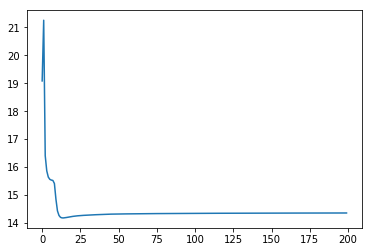

In [48]:
model_lr.learn_weights(y, tx)
model_lr.dbg.plot('loss')

In [49]:
y_ = model_lr.predict(tx_te)
print('Test accuracy', misc.accuracy(y_te, y_))

y_ = model_lr.predict(tx)
print('train accuracy', misc.accuracy(y, y_))

Test accuracy 0.584091535704439
train accuracy 0.5838924118494011
